## Dependencias

In [1]:
!pip install --upgrade pip
!pip install pillow

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from datetime import datetime
from dateutil.relativedelta import relativedelta as rd

In [3]:
ini = datetime.now()

In [4]:
ruta  = '/tf/bd/cats_dogs_mini/'

In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

## Red profunda desde donde se transferirá el conocimiento

In [7]:
base = VGG16(weights='imagenet', #Características aprendidas
             include_top=False, #Descartar capa densa final
             input_shape=(150,150,3))

In [8]:
modelo = models.Sequential()
modelo.add(base)
modelo.add(layers.Flatten())
modelo.add(layers.Dropout(0.5))
modelo.add(layers.Dense(512,activation='relu'))
modelo.add(layers.Dense(1,activation='sigmoid'))

In [9]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 18,910,017
Non-trainable params: 0
_________________________________________________________________


In [10]:
base.trainable = False

In [11]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
_________________________________________________________________


## Preparación de datos

In [12]:
dest = '/tf/bd/cats_dogs_mini/'

In [24]:
train = ImageDataGenerator(rotation_range=40, #Rota las imágenes aleatoriamente
                           width_shift_range=0.2, # Traslada horizontalmente
                           height_shift_range=0.2, #Traslada verticalmente
                           shear_range=0.2, #transformaciones de corte (cizalla)
                           zoom_range=0.2, #acercamientos aleatorios
                           horizontal_flip=True, #Voltea horizontalmente
                           fill_mode='nearest',
                           rescale = 1/255
                          )


test = ImageDataGenerator(rescale=1/255)

In [25]:
train = train.flow_from_directory(os.path.join(dest,'train'),
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
validation = test.flow_from_directory(os.path.join(dest,'validate'),
                                  target_size=(150,150),
                                  batch_size=20,
                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [27]:
modelo.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(learning_rate=1e-4),
               metrics=['acc'])

In [28]:
history = modelo.fit_generator(train,
                     steps_per_epoch=2000//32,
                     epochs=30,
                     validation_data=validation,
                     validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 50 steps
Epoch 1/30
62/62 [==============================] - 12s 199ms/step - loss: 0.5728 - acc: 0.7266 - val_loss: 0.3915 - val_acc: 0.8510
Epoch 2/30
62/62 [==============================] - 12s 197ms/step - loss: 0.4586 - acc: 0.7856 - val_loss: 0.3124 - val_acc: 0.8660
Epoch 3/30
62/62 [==============================] - 12s 198ms/step - loss: 0.4192 - acc: 0.8130 - val_loss: 0.3082 - val_acc: 0.8680
Epoch 4/30
62/62 [==============================] - 12s 199ms/step - loss: 0.4126 - acc: 0.8171 - val_loss: 0.3106 - val_acc: 0.8690
Epoch 5/30
62/62 [==============================] - 12s 199ms/step - loss: 0.3995 - acc: 0.8089 - val_loss: 0.2995 - val_acc: 0.8710
Epoch 6/30
62/62 [==============================] - 12s 200ms/step - loss: 0.3767 - acc: 0.8252 - val_loss: 0.2977 - val_acc: 0.8690
Epoch 7/30
62/62 [==============================] - 13s 203ms/step - loss: 0.3835 - acc: 0.8232 - val_loss: 0.

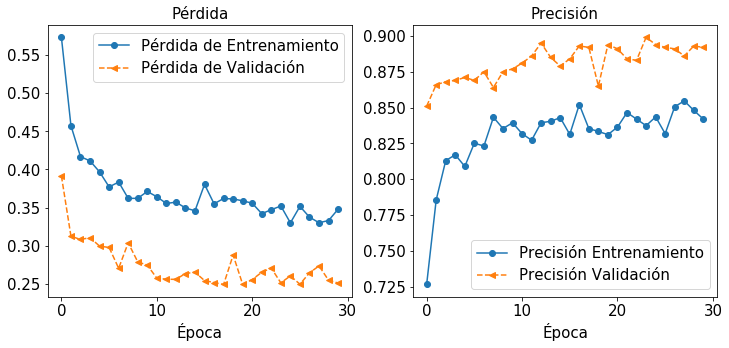

In [29]:
hist = history.history
x_arr = np.arange(len(hist['loss']))+1
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(hist['loss'],'-o',label='Pérdida de Entrenamiento')
ax.plot(hist['val_loss'],'--<',label='Pérdida de Validación')
ax.set_title('Pérdida',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(hist['acc'],'-o',label='Precisión Entrenamiento')
ax.plot(hist['val_acc'],'--<',label='Precisión Validación')
ax.set_title('Precisión',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax.legend(fontsize=15)
plt.show()

In [19]:
rd(datetime.now(),ini)

relativedelta(minutes=+6, seconds=+32, microseconds=+600740)